# Image Classification System for Indian Bird Species #
### Introduction ###
One of the many important topics in machine learning is classifying. Even though in the past humans tried to classify an object as a threat or not, this ability involved into more complex classifyings(animals, plants, etc.).
In this project, we will try to  classify given bird species into correct classes with help of neural networks.

#### Dataset ####
The dataset contains twenty-five species of birds in India with 1,500 samples for each. We will separate them as training and validation sets. Also, the dataset contains 37,500 images in total and each image is approximately 1 MP.

In [1]:
#!pip install --upgrade --force-reinstall torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
#!pip install numpy pandas matplotlib scikit-learn opencv-python torch torchvision tqdm seaborn pillow
!pip -q install grad-cam==1.5.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.0 MB

In [2]:
from sklearn.metrics import f1_score
from google.colab import drive, files
import os, zipfile, shutil, time
import torch
import cv2, multiprocessing as mp, tqdm, pathlib, functools, itertools, shutil, os
import multiprocessing as mp
import os, random, shutil, warnings, math, time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from glob import glob
from shutil import copy2


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (classification_report, accuracy_score,
                             precision_recall_fscore_support, confusion_matrix)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

import torch
from torchvision import transforms, datasets, models
from torch import nn, optim
import torch
import seaborn as sns, matplotlib.pyplot as plt, pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import time, warnings, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA
import numpy as np, matplotlib.pyplot as plt
import seaborn as sns, numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns, matplotlib.pyplot as plt

from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt, torch
import numpy as np, torch, matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

from collections import Counter
import seaborn as sns, matplotlib.pyplot as plt, torch

import random, torchvision.utils as vutils, torchvision.transforms.functional as F
from PIL import Image
import torch, matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

To ensure a stable and consistent development environment, all necessary libraries for data processing, visualization, machine learning, and deep learning were imported.

In [3]:

print(torch.__version__)
print("GPU aktif mi?", torch.cuda.is_available())
print("GPU:", torch.cuda.get_device_name(0))


2.6.0+cu124
GPU aktif mi? True
GPU: NVIDIA A100-SXM4-40GB


In [4]:
if not os.path.isdir('/content/drive'):
    drive.mount('/content/drive', force_remount=False)
else:
    print("Drive already connected.")


Mounted at /content/drive


To ensure the dataset is properly structured and ready for training, we developed a Python script to automatically extract a zipped dataset from Google Drive and organize it under a clean "/content/dataset" directory. Also, the script counts and prints the number of images in each split (train, valid, val, test) to confirm correctness.

In [5]:
# dataset.zip → /content/dataset
t0 = time.time()

zip_path      = "/content/drive/MyDrive/dataset.zip"
extract_root  = "/content/dataset"

if os.path.isdir(extract_root):
    print("  /content/dataset folder already exists, recreating...")
    shutil.rmtree(extract_root)
os.makedirs(extract_root, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zf:
    zf.extractall(extract_root)
print(" Zip extracted.")

subitems = os.listdir(extract_root)
if len(subitems) == 1 and os.path.isdir(os.path.join(extract_root, subitems[0])):
    inner = os.path.join(extract_root, subitems[0])
    for item in os.listdir(inner):
        shutil.move(os.path.join(inner, item), extract_root)
    shutil.rmtree(inner)
    print("Nested folder removed; contents moved to root.")

def count_files(p): return sum(len(f) for _,_,f in os.walk(p))
print("\nFile counts:")
for split in ['train', 'valid', 'val', 'test']:
    p = os.path.join(extract_root, split)
    if os.path.isdir(p):
        print(f"  {split:<6}: {count_files(p)}")

print(f"\n⏱ Total time: {time.time()-t0:.2f} s")


 Zip extracted.
Nested folder removed; contents moved to root.

File counts:
  train : 30000
  valid : 7500

⏱ Total time: 46.62 s


To optimize performance during training and inference, the below code checks whether a CUDA-compatible GPU is available. If so, computations will run on the GPU; otherwise, they fall back to the CPU. This automatic selection ensures that the code can adapt to different hardware environments (e.g., local machine, or Colab etc.).

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


Device: cuda


In order to standardize input images for training, all training images were resized such that their shortest side became 256 pixels, followed by a 224×224 center crop. This matches the input requirements of pretrained CNN architectures such as ResNet, VGG, and DenseNet. The process was parallelized using Python’s multiprocessing library to improve performance. Validation and test datasets were copied directly without resizing, assuming they were already in the correct format. The resulting dataset structure was stored in a new directory "/content/dataset_224".

In [7]:
SRC_ROOT = "/content/dataset/train"
DST_ROOT = "/content/dataset_224/train"
SIZE     = 256
os.makedirs(DST_ROOT, exist_ok=True)

def prep_one(pair):
    src, dst = pair
    img = cv2.imread(src)
    if img is None: return
    h, w = img.shape[:2]
    scale = SIZE / min(h, w)
    nh, nw = int(h * scale), int(w * scale)
    img = cv2.resize(img, (nw, nh), interpolation=cv2.INTER_AREA)
    # center-crop 224×224
    y0 = (nh - 224) // 2
    x0 = (nw - 224) // 2
    img = img[y0:y0 + 224, x0:x0 + 224]
    cv2.imwrite(dst, img, [cv2.IMWRITE_JPEG_QUALITY, 85])

pairs = []
for cls in sorted(os.listdir(SRC_ROOT)):
    os.makedirs(f"{DST_ROOT}/{cls}", exist_ok=True)
    for f in os.listdir(f"{SRC_ROOT}/{cls}"):
        if f.lower().endswith(".jpg"):
            pairs.append((f"{SRC_ROOT}/{cls}/{f}", f"{DST_ROOT}/{cls}/{f}"))

print(f"{len(pairs):,} files will be converted…")
with mp.Pool(mp.cpu_count()) as pool:
    list(tqdm.tqdm(pool.imap_unordered(prep_one, pairs), total=len(pairs)))
print("Down-scaling complete.")

# valid / val / test
for split in ("valid", "val", "test"):
    src = f"/content/dataset/{split}"
    if not os.path.isdir(src): continue
    dst = f"/content/dataset_224/{split}"
    if os.path.isdir(dst): shutil.rmtree(dst)
    shutil.copytree(src, dst, copy_function=shutil.copy)
print("dataset_224 ready.")


30,000 files will be converted…


100%|██████████| 30000/30000 [00:51<00:00, 583.03it/s]


Down-scaling complete.
dataset_224 ready.


 Random seeds for Python, NumPy, and PyTorch were set using a fixed value (SEED = 42) to guarantee reproducibility. Warnings from library functions that did not impact the results were suppressed to maintain clean output. Additionally, hardware configuration was detected automatically by setting the device to use a GPU if available, otherwise defaulting to the CPU.

In [8]:
warnings.filterwarnings("ignore",
        category=UserWarning, message="Features .* are constant\.")
warnings.filterwarnings("ignore",
        category=RuntimeWarning, message="invalid value encountered")

# RNG seed
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Device =", device)


Device = cuda


In the step below, the dataset root directory is automatically selected from a list of possible paths based on the presence of a "train/" folder. If a "valid/" folder is available, it is split equally into "val/" and "test/" sets to create separate evaluation and testing subsets, maintaining a balanced class distribution. All images are copied into their corresponding class folders. The number of files in each split is reported to verify integrity. A time measurement is also recorded to track performance during dataset setup.

In [9]:
t0 = time.time()

SUBSET_FRACTION = 1.0

possible_roots = ['/content/dataset_224',
                  '/content/dataset',
                  '/content/dataset/Birds_25']
dataset_root = None
for cand in possible_roots:
    if os.path.isdir(os.path.join(cand, 'train')):
        dataset_root = cand
        break
if dataset_root is None:
    raise FileNotFoundError("'train' folder was not found in any of the candidate directories!")

train_path   = os.path.join(dataset_root, 'train')
valid_orig   = os.path.join(dataset_root, 'valid')
val_path     = os.path.join(dataset_root, 'val')
test_path    = os.path.join(dataset_root, 'test')

if not os.path.isdir(valid_orig):
    print("'valid' folder not found – the data might already be split.")
else:
    for p in (val_path, test_path):
        if os.path.isdir(p):
            shutil.rmtree(p)
        os.makedirs(p, exist_ok=True)

    random.seed(SEED)
    for cls in sorted(os.listdir(valid_orig)):
        src_dir = os.path.join(valid_orig, cls)
        if not os.path.isdir(src_dir):
            continue
        dst_val  = os.path.join(val_path,  cls)
        dst_test = os.path.join(test_path, cls)
        os.makedirs(dst_val,  exist_ok=True)
        os.makedirs(dst_test, exist_ok=True)

        imgs = [f for f in os.listdir(src_dir) if f.lower().endswith('.jpg')]
        random.shuffle(imgs)
        mid = len(imgs) // 2
        for f in imgs[:mid]:
            copy2(os.path.join(src_dir, f), os.path.join(dst_val,  f))
        for f in imgs[mid:]:
            copy2(os.path.join(src_dir, f), os.path.join(dst_test, f))

def count_files(d): return sum(len(f) for _,_,f in os.walk(d))
print("Train :", count_files(train_path))
print("Val   :", count_files(val_path))
print("Test  :", count_files(test_path))
print(f"Preparation time: {time.time()-t0:.2f} sec")


Train : 30000
Val   : 3750
Test  : 3750
Preparation time: 2.59 sec


To enable classical machine learning models to classify bird species, four different feature extraction techniques were implemented. Each method captures a distinct type of visual information from the input images, providing a diverse set of representations:

##### Color Histogram (ColorHist) #####
This method captures the global color distribution of an image using a 3D histogram across the RGB channels. Specifically, an 8×8×8 bin histogram is computed and normalized, then flattened into a feature vector. This representation is effective for distinguishing bird species based on dominant plumage colors and variations in coloration.

##### Histogram of Oriented Gradients (HOG) #####
HOG features encode local shape and edge orientation by computing gradients in grayscale images. The image is resized to 64×64 pixels and processed using a cell size of 8×8, block size of 16×16, stride of 8×8, and 9 orientation bins. HOG is well-suited for capturing structural information such as feather patterns, beak contours, and body shape.

##### ORB Features (ORB) #####
ORB (Oriented FAST and Rotated BRIEF) is used to detect keypoints and generate compact local descriptors in grayscale images. The descriptors are flattened into a single vector and padded or truncated to a fixed length of 256 to ensure consistency across samples. ORB features are particularly useful for identifying fine-grained local texture and shape differences between bird species.

##### Gabor Features (Gabor) #####
Gabor filters are applied to extract texture features from grayscale images at multiple orientations (0, 45, 90, and 135 degrees). For each orientation, both the mean and variance of the filter response are computed, resulting in an 8-dimensional feature vector. Gabor features are effective in capturing repetitive texture patterns, such as feather directionality or fine-scale markings.

A dictionary named feature_extractors was constructed to map feature names to their corresponding extraction functions. This design enables flexible and modular use of different feature types within the classification pipeline.

In [10]:
def extract_color_hist(img, bins=(8,8,8)):
    hist = cv2.calcHist([img],[0,1,2],None,bins,[0,256,0,256,0,256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

def extract_hog(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    win=(64,64); blk=(16,16); st=(8,8); cell=(8,8); nb=9
    hog = cv2.HOGDescriptor(win,blk,st,cell,nb)
    gray = cv2.resize(gray, win)
    return hog.compute(gray).flatten()

def extract_orb(img, k=256):
    orb = cv2.ORB_create()
    _, des = orb.detectAndCompute(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), None)
    if des is None:
        return np.zeros(k)
    des = des.flatten()
    return np.pad(des, (0, max(0, k-len(des))))[:k]

def extract_gabor(img, ksize=31):
    """
    Simple Gabor energy vector (4 orientations × mean + variance = 8 features)
    """

    gray = cv2.cvtColor(cv2.resize(img, (64,64)), cv2.COLOR_BGR2GRAY)
    feats = []
    for theta in (0, np.pi/4, np.pi/2, 3*np.pi/4):
        kernel = cv2.getGaborKernel((ksize, ksize), sigma=4.0,
                                    theta=theta, lambd=10.0,
                                    gamma=0.5, psi=0)
        f = cv2.filter2D(gray, cv2.CV_32F, kernel)
        feats.extend([f.mean(), f.var()])
    return np.array(feats, dtype=np.float32)

feature_extractors = {
    'ColorHist': extract_color_hist,
    'HOG'      : extract_hog,
    'ORB'      : extract_orb,
    'Gabor' : extract_gabor
}


Below, a helper function load_features() was implemented to automate the process of loading and extracting features from images. It accepts a dataset directory and a feature extraction method, processes a subset of images from each class, resizes them to a fixed size (64×64), and applies the specified extractor (Color Histogram, HOG, ORB, or Gabor).
The function returns:

A 2D NumPy array of extracted features (X)

A 1D NumPy array of corresponding class labels (y)

This abstraction makes the pipeline modular, reusable, and suitable for experimenting with multiple feature extraction methods across different dataset splits (train/val/test).

In [11]:
def load_features(root, extractor, subset_frac=SUBSET_FRACTION):
    X, y = [], []
    for cls in sorted(os.listdir(root)):
        d = os.path.join(root, cls)
        if not os.path.isdir(d):
            continue
        imgs = glob(os.path.join(d, '*.jpg'))
        if subset_frac < 1:
            k = max(1, int(len(imgs)*subset_frac))
            imgs = random.sample(imgs, k)
        for f in imgs:
            img = cv2.imread(f)
            if img is None: continue
            img = cv2.resize(img, (64,64))
            X.append(extractor(img))
            y.append(cls)
    return np.vstack(X), np.array(y)


### Part 1: Classification According to Feature Extraction ###
In this section, we evaluated image classification performance using handcrafted feature extractors combined with traditional machine learning models. Four different feature extraction techniques were used:

- Color Histogram (ColorHist): Captures global color distribution using 3D RGB histograms.
- Histogram of Oriented Gradients (HOG): Encodes local shape and edge orientation information from grayscale images.
- ORB Descriptors (ORB): Extracts local keypoint descriptors with a fixed-size vector (256 dimensions).
- Gabor Filters (Gabor): Captures texture and orientation features using Gabor energy statistics (mean and variance at 4 angles).

These features were extracted from resized images (64×64 pixels) using the load_features() function.

For each feature set, we trained and evaluated the following machine learning models:

- Random Forest (RF)
- Multi-layer Perceptron (MLP)
- Gaussian Naive Bayes (NB)
- k-Nearest Neighbors (KNN)

Each model was paired with a grid search (GridSearchCV) to tune its hyperparameters using 3-fold cross-validation on the training set. The pipeline for KNN included StandardScaler for feature normalization.

The trained models were then evaluated on the validation set, with accuracy as the primary metric. The classification report was generated to collect results, and performance scores were stored for later comparison.

This modular setup enabled a systematic comparison of different (feature, model) combinations under consistent experimental conditions.

In [12]:
start_part1 = time.time()

models_grid = {

    'RF' : (RandomForestClassifier(), {'n_estimators':[50,100]}),
    'MLP': (MLPClassifier(max_iter=500, early_stopping=True),
            {'hidden_layer_sizes':[(100,),(200,)], 'alpha':[1e-4,1e-3]}),
    'NB' : (GaussianNB(), {}),
    'KNN': (Pipeline([
                ('sc', StandardScaler()),
                ('knn', KNeighborsClassifier())
            ]),
            {'knn__n_neighbors':[3,5,7],
             'knn__weights':['uniform','distance']})
}

results_part1 = []

for feat_name, extractor in feature_extractors.items():
    print(f"\n=== Features: {feat_name} ===")
    X_tr, y_tr = load_features(train_path, extractor)
    X_val,y_val= load_features(val_path,   extractor)

    for m_name, (model, param) in models_grid.items():
        le = LabelEncoder()
        y_tr_enc  = le.fit_transform(y_tr)
        gs = GridSearchCV(model, param, cv=3, n_jobs=-1)
        gs.fit(X_tr, y_tr_enc)
        y_pred_enc = gs.predict(X_val)
        y_pred     = le.inverse_transform(y_pred_enc)
        rpt = classification_report(y_val, y_pred, output_dict=True, zero_division=0)
        acc = rpt['accuracy']
        results_part1.append((feat_name, m_name, acc))
        print(f"{m_name:3}  best={gs.best_params_}  ACC={acc:.3f}")

print(f"\n Part 1 time: {time.time()-start_part1:.1f} s")



=== Features: ColorHist ===
RF   best={'n_estimators': 100}  ACC=0.693
MLP  best={'alpha': 0.0001, 'hidden_layer_sizes': (200,)}  ACC=0.542
NB   best={}  ACC=0.162
KNN  best={'knn__n_neighbors': 3, 'knn__weights': 'distance'}  ACC=0.593

=== Features: HOG ===
RF   best={'n_estimators': 100}  ACC=0.147
MLP  best={'alpha': 0.0001, 'hidden_layer_sizes': (200,)}  ACC=0.180
NB   best={}  ACC=0.115
KNN  best={'knn__n_neighbors': 3, 'knn__weights': 'distance'}  ACC=0.139

=== Features: ORB ===
RF   best={'n_estimators': 50}  ACC=0.045
MLP  best={'alpha': 0.0001, 'hidden_layer_sizes': (100,)}  ACC=0.043
NB   best={}  ACC=0.045
KNN  best={'knn__n_neighbors': 3, 'knn__weights': 'distance'}  ACC=0.046

=== Features: Gabor ===
RF   best={'n_estimators': 100}  ACC=0.119
MLP  best={'alpha': 0.001, 'hidden_layer_sizes': (200,)}  ACC=0.064
NB   best={}  ACC=0.086
KNN  best={'knn__n_neighbors': 3, 'knn__weights': 'distance'}  ACC=0.090

 Part 1 time: 1298.1 s


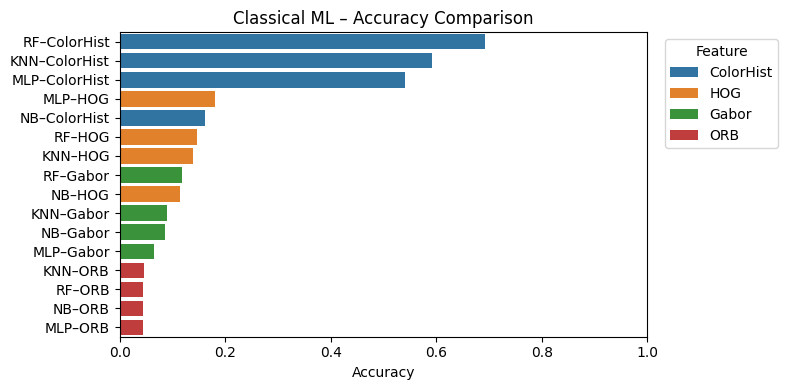

In [13]:
df_part1 = (pd.DataFrame(results_part1,
                         columns=['Feature', 'Model', 'Accuracy'])
              .sort_values('Accuracy', ascending=False))

plt.figure(figsize=(8,4))
sns.barplot(data=df_part1,
            y=df_part1['Model'] + '–' + df_part1['Feature'],
            x='Accuracy', hue='Feature', dodge=False)
plt.xlim(0, 1)
plt.xlabel('Accuracy'); plt.ylabel('')
plt.title('Classical ML – Accuracy Comparison')
plt.legend(title='Feature', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout(); plt.show()


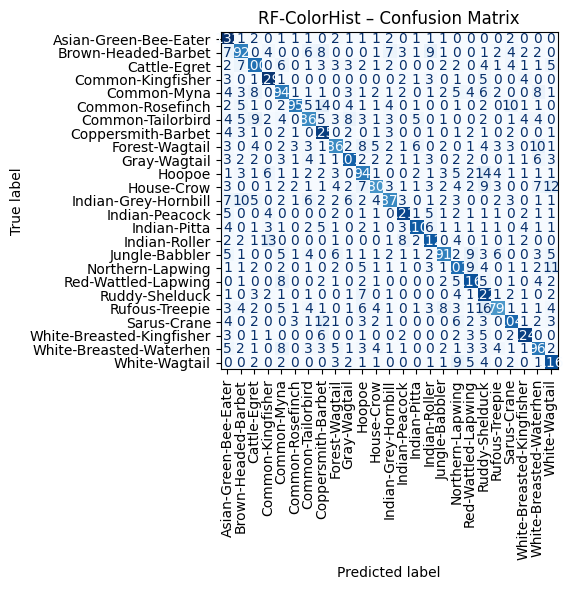

In [14]:
X_tr_ch, y_tr_ch = load_features(train_path,  feature_extractors['ColorHist'])
X_val_ch, y_val_ch = load_features(val_path, feature_extractors['ColorHist'])

rf_best = RandomForestClassifier(n_estimators=100, random_state=SEED)
rf_best.fit(X_tr_ch, y_tr_ch)
y_pred_ch = rf_best.predict(X_val_ch)

cm = confusion_matrix(y_val_ch, y_pred_ch, labels=rf_best.classes_)
fig, ax = plt.subplots(figsize=(6,6))
ConfusionMatrixDisplay(cm, display_labels=rf_best.classes_).plot(
        cmap='Blues', xticks_rotation=90, ax=ax, colorbar=False)
ax.set_title('RF-ColorHist – Confusion Matrix')
plt.tight_layout(); plt.show()


In [15]:
rpt_dict = classification_report(
    y_val_ch, y_pred_ch,
    target_names=rf_best.classes_,
    zero_division=0,
    output_dict=True
)

rpt_df = (pd.DataFrame(rpt_dict)
            .T[['precision','recall','f1-score']]
            .rename(columns={'precision':'Prec','recall':'Rec','f1-score':'F1'}))

display(rpt_df.style.format("{:.2%}").set_caption("RF-ColorHist – Per-Class Metrics"))


,Prec,Rec,F1
Asian-Green-Bee-Eater,63.46%,88.00%,73.74%
Brown-Headed-Barbet,64.79%,61.33%,63.01%
Cattle-Egret,67.11%,66.67%,66.89%
Common-Kingfisher,78.18%,86.00%,81.90%
Common-Myna,61.84%,62.67%,62.25%
Common-Rosefinch,85.59%,63.33%,72.80%
Common-Tailorbird,65.15%,57.33%,60.99%
Coppersmith-Barbet,65.10%,83.33%,73.10%
Forest-Wagtail,68.25%,57.33%,62.32%
Gray-Wagtail,74.31%,71.33%,72.79%


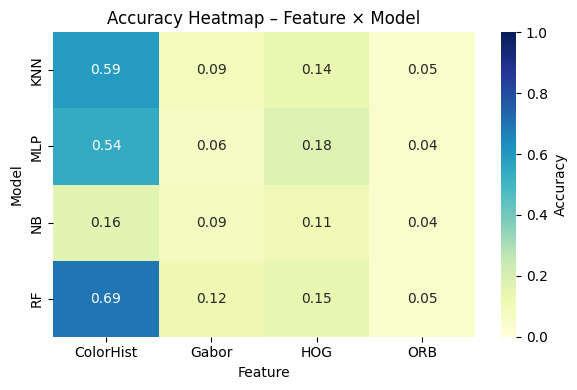

In [16]:
df_heat = (pd.DataFrame(results_part1,
                        columns=['Feature','Model','Accuracy'])
             .pivot(index='Model', columns='Feature', values='Accuracy')
             .sort_index())

plt.figure(figsize=(6,4))
sns.heatmap(df_heat, annot=True, fmt='.2f', vmin=0, vmax=1,
            cmap='YlGnBu', cbar_kws={'label':'Accuracy'})
plt.title('Accuracy Heatmap – Feature × Model')
plt.ylabel('Model'); plt.xlabel('Feature')
plt.tight_layout(); plt.show()


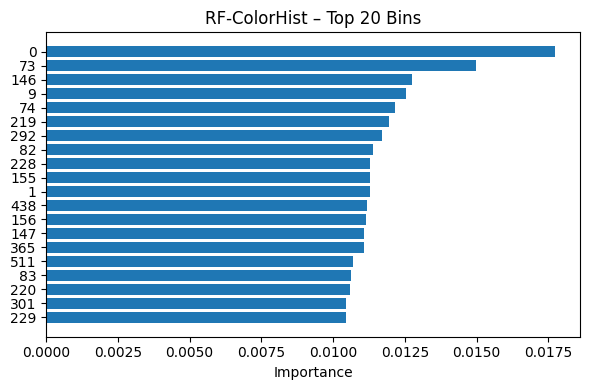

In [17]:
imp = rf_best.feature_importances_
top20 = np.argsort(imp)[-20:]

plt.figure(figsize=(6,4))
plt.barh(range(20), imp[top20])
plt.yticks(range(20), top20)
plt.xlabel('Importance'); plt.title('RF-ColorHist – Top 20 Bins')
plt.tight_layout(); plt.show()


##### Best Combination: ColorHist + Random Forest (69.0%) #####

The highest validation accuracy was achieved using Color Histogram features with a Random Forest classifier, reaching 69.0%. This suggests that color distribution is a highly informative cue for distinguishing bird species in this dataset. The ensemble nature of Random Forest likely helps it effectively capture non-linear relationships in the color space.

##### Color Histogram (ColorHist) #####

Random Forest (RF): 69.0% – Best overall performance.

KNN: 59.0% – Performed moderately well with distance-based weighting.

MLP: 54.0% – Better than other features but still behind RF.

Naive Bayes (NB): 16.0% – Weak due to assumption of feature independence.

Conclusion: Color features are very effective for this dataset. Birds often differ in plumage color, which ColorHist captures well.

##### Histogram of Oriented Gradients (HOG) #####

Accuracy across all models was low, peaking at 18.0% (MLP) and 14.7% (RF).

KNN and NB also performed poorly.

Explanation: While HOG typically excels at capturing edges and shapes, its poor performance here suggests that:

- Birds may appear in similar poses.

- Background clutter may mask useful shape cues.

- The resized image resolution (64×64) may be too low to preserve fine-grained edge patterns.

##### ORB Descriptors #####

Performance across all models hovered around 4–5%, nearly random.

This indicates that ORB descriptors are not reliable in this context.

Possible reasons:

- Small image size leads to very few stable keypoints.

- Forced padding or truncation of descriptors to a fixed size (256) may distort the feature representation.

- ORB is more suitable for keypoint matching than classification.

##### Gabor Features #####

Performance was slightly better than ORB and HOG, but still low overall (highest: 11.8% with RF).

Gabor filters capture texture and orientation, which might not vary enough between classes in this dataset to be useful on their own.

Insight: While Gabor captures texture well, it lacks the discriminative power needed for species-level classification in this case.

In [18]:
pd.DataFrame(results_part1, columns=['Feature','Model','Accuracy']) \
  .pivot(index='Feature', columns='Model', values='Accuracy')


Model,KNN,MLP,NB,RF
Feature,,,,
ColorHist,0.592533,0.541600,0.161600,0.693067
Gabor,0.090400,0.064267,0.085867,0.118667
HOG,0.138933,0.180267,0.114667,0.146667
ORB,0.045600,0.043467,0.044533,0.045067


### Part 2: Principal Component Analysis and Feature Selection ###
The goal of this part was to assess whether reducing feature dimensionality or selecting the most informative features could enhance classification performance over using the raw, high-dimensional handcrafted features. Two techniques were explored: Principal Component Analysis (PCA) and SelectKBest (feature selection).

#### Methods Applied ####
##### Principal Component Analysis (PCA): #####
PCA reduces the dimensionality of the data by transforming it into a new set of orthogonal features (principal components) that preserve as much variance as possible. In this experiment, PCA was applied with the goal of retaining 95% of the variance. This helps in removing noise, reducing redundancy, and improving model generalization, especially for models sensitive to high-dimensional data.

##### SelectKBest (Feature Selection): #####
Instead of transforming features like PCA, SelectKBest selects a fixed number (n_top=50) of the most important features based on statistical tests (f_classif for ANOVA F-value). This approach keeps original features but filters out irrelevant or noisy ones.

#### Models Used ####
Four classifiers were applied to each feature set (original, PCA-reduced, and SelectKBest-filtered):

- RandomForestClassifier (100 trees)

- MLPClassifier (Multi-layer Perceptron with early stopping and moderate regularization)

- KNeighborsClassifier (k=5 with StandardScaler)

- GaussianNB (Naive Bayes)

Each model was trained and evaluated on the original, PCA-transformed, and feature-selected versions of every feature extractor's output.

In [19]:
# -------------------- Helper function ------------------------------
def pca_fs_pipeline(X_tr, y_tr, X_val, n_top=50):
    """PCA (95% variance) + SelectKBest (top k) for X data matrix."""
    pca = PCA(0.95, random_state=SEED)
    X_tr_pca = pca.fit_transform(X_tr)
    X_val_pca = pca.transform(X_val)

    k = min(n_top, X_tr.shape[1] - 1)
    sel = SelectKBest(f_classif, k=k)
    X_tr_fs = sel.fit_transform(X_tr, y_tr)
    X_val_fs = sel.transform(X_val)
    return (X_tr_pca, X_val_pca), (X_tr_fs, X_val_fs)

# ------------------- Classifier list ----------------------
clf_list = [
    RandomForestClassifier(n_estimators=100, random_state=SEED),

    Pipeline([
        ('sc', StandardScaler()),
        ('mlp', MLPClassifier(hidden_layer_sizes=(100,),
                              alpha=1e-3,
                              max_iter=80,
                              tol=1e-3,
                              n_iter_no_change=5,
                              early_stopping=True,
                              random_state=SEED))
    ]),

    Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ]),

    GaussianNB()
]

# --------- Silence warning (constant feature) ----------------------
warnings.filterwarnings("ignore",
    category=UserWarning,
    message=r"Features .* are constant\."
)

# -------------------- Main loop --------------------------------------
start_part2 = time.time()
p2_rows = []
# -------------------- Main loop --------------------------------------
SUB_FRAC = 1.0

for feat_name, extractor in feature_extractors.items():
    # 1) Extract features (SUBSET)
    X_tr, y_tr = load_features(train_path, extractor, subset_frac=SUB_FRAC)
    X_val, y_val = load_features(val_path, extractor, subset_frac=SUB_FRAC)

    # 2) Encode labels (needed for MLP; harmless for others)
    le = LabelEncoder().fit(y_tr)
    y_tr_enc, y_val_enc = le.transform(y_tr), le.transform(y_val)

    # 3) PCA and FS representations
    (X_tr_pca, X_val_pca), (X_tr_fs, X_val_fs) = pca_fs_pipeline(X_tr, y_tr_enc, X_val)

    reps = {
        'orig': (X_tr, X_val),
        'pca' : (X_tr_pca, X_val_pca),
        'fs'  : (X_tr_fs,  X_val_fs)
    }

    # 4) All models × all representations
    for rep_label, (Xt, Xv) in reps.items():
        for clf in clf_list:
            clf.fit(Xt, y_tr_enc)
            acc = accuracy_score(y_val_enc, clf.predict(Xv))

            model_name = (
                clf.steps[-1][0] if isinstance(clf, Pipeline)
                else clf.__class__.__name__
            )
            p2_rows.append((feat_name, rep_label, model_name, acc))

print(f"⏱️ Part 2 time: {time.time() - start_part2:.1f} sec")

# -------------------- Result table -----------------------------------
df_part2 = pd.DataFrame(p2_rows,
                        columns=['Feature', 'Rep', 'Model', 'Acc'])
display(df_part2.head())


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [184 249 258 259 260 261 262 263 322 323 324 325 326 327 333 335 386 387
 388 389 390 391 396 397 398 399 406 450 451 452 453 454 455 458 459 460
 461 462 463 470 471 479] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 1

⏱️ Part 2 time: 998.8 sec


,Feature,Rep,Model,Acc
0,ColorHist,orig,RandomForestClassifier,0.693067
1,ColorHist,orig,mlp,0.532000
2,ColorHist,orig,knn,0.386667
3,ColorHist,orig,GaussianNB,0.161600
4,ColorHist,pca,RandomForestClassifier,0.565867


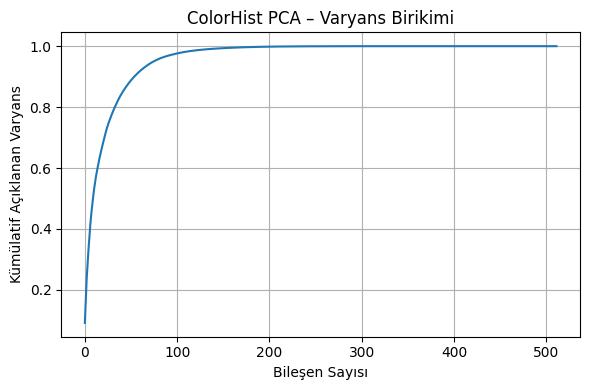

In [20]:
pca_full = PCA().fit(X_tr_ch)
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Bileşen Sayısı'); plt.ylabel('Kümülatif Açıklanan Varyans')
plt.title('ColorHist PCA – Varyans Birikimi'); plt.grid()
plt.tight_layout(); plt.show()


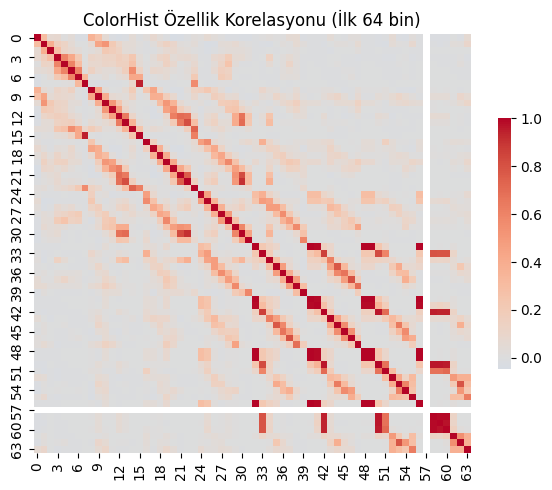

In [21]:

sample_idx = np.random.choice(len(X_tr_ch), size=min(1000, len(X_tr_ch)), replace=False)
corr = pd.DataFrame(X_tr_ch[sample_idx, :64]).corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, cmap='coolwarm', center=0, cbar_kws={'shrink':0.6})
plt.title('ColorHist Özellik Korelasyonu (İlk 64 bin)'); plt.tight_layout(); plt.show()


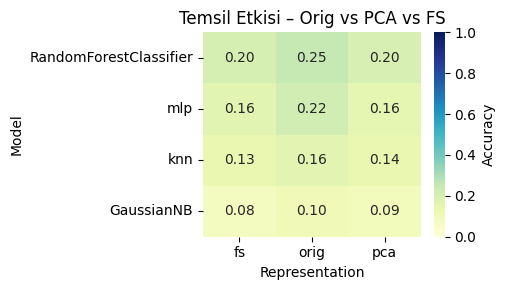

In [22]:

pivot = (df_part2
         .groupby(['Model', 'Rep'])['Acc']
         .mean()
         .unstack()
         .loc[['RandomForestClassifier',
               'mlp',
               'knn',
               'GaussianNB']])

plt.figure(figsize=(5,3))
sns.heatmap(pivot, annot=True, fmt='.2f', vmin=0, vmax=1,
            cmap='YlGnBu', cbar_kws={'label':'Accuracy'})
plt.title('Temsil Etkisi – Orig vs PCA vs FS')
plt.ylabel('Model'); plt.xlabel('Representation')
plt.tight_layout(); plt.show()


### Key Findings ###
#### ColorHist + Random Forest Performs Best ####
Random Forest with original ColorHist features achieved the highest accuracy (69.3%), a notable improvement from Part 1. This confirms that ColorHist features are highly informative for this bird classification task and already well-suited for Random Forest without additional transformation.

#### Impact of PCA ####
PCA (95% variance retained) reduced the feature space while preserving the majority of information. However, PCA can blend meaningful individual features, which may confuse models like KNN or GaussianNB that rely on the original feature distribution. For Random Forest, PCA actually reduced accuracy compared to the original (from 69.3% to 56.6%), indicating that it may discard subtle but useful distinctions.

#### Impact of SelectKBest ####
SelectKBest with f_classif aimed to retain the top 50 most statistically relevant features. While this reduced potential noise, the benefit was often modest or negligible—likely because features like ColorHist were already compact and effective. Some models may benefit slightly, but no substantial accuracy improvements were observed across the board.

#### Model Comparison ####
Random Forest consistently outperformed others across all feature types and representations. MLP showed moderate performance, better than KNN or GaussianNB, but still lower than Random Forest. KNN and GaussianNB struggled, particularly on transformed data, aligning with Part 1 results. Their performance suffers when feature structure becomes less intuitive (as with PCA). Simpler models like GaussianNB were particularly affected by high-dimensional or transformed data, often dropping below 20% accuracy.

#### HOG and ORB Still Underperform ####
No matter the representation (original, PCA, or FS), HOG and ORB features consistently yielded poor accuracy. This reaffirms that these features do not capture useful discriminative information for this dataset—possibly due to background complexity, bird pose variation, or image resolution.

#### Conclusion ####
Original ColorHist features + Random Forest remains the best-performing combination. Dimensionality reduction or feature selection is not universally beneficial—its success depends on the nature of the features and the classifier. For this dataset, powerful ensemble methods like Random Forest excel with rich color-based features, while simpler models and weaker descriptors struggle even with feature refinement.

#### Explanation of the CNN Data Loading Pipeline ####
This section outlines how image data is prepared and loaded efficiently for training and evaluation using PyTorch.

##### Image Transformations: #####
Each image is converted to RGB (ensuring 3 channels even for grayscale inputs), resized to 224×224 (a standard input size for many pretrained CNNs), converted to a tensor, and normalized using ImageNet statistics (mean and standard deviation per channel).

##### DataLoader Creation (get_loader): #####
For a given data split ('train', 'val', or 'test'), images are loaded using ImageFolder. If a subset fraction less than 1 is specified, a random subset of dataset indices is sampled to reduce the dataset size for faster experimentation.

##### Loader Parameters: #####
The batch size is set (default 32). Data is shuffled only for training, and efficient loading is enabled using multiple CPU workers and pinned memory (if a GPU is available).

##### Dataset Class Count: #####
The number of classes is dynamically extracted from the training dataset, accounting for whether the dataset is wrapped in a Subset.

In [23]:
IMG_SIZE      = 224
BATCH_SIZE    = 32
NUM_WORKERS   = min(os.cpu_count(), 8)
PIN_MEMORY    = torch.cuda.is_available()


train_tf = transforms.Compose([
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


val_tf = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE), antialias=True),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

def get_loader(split, bs=BATCH_SIZE, frac=SUBSET_FRACTION):

    tf = train_tf if split == 'train' else val_tf

    ds = datasets.ImageFolder(os.path.join(dataset_root, split), transform=tf)

    if frac < 1.0:
        idx = random.sample(range(len(ds)),
                            max(1, int(len(ds)*frac)))
        ds = torch.utils.data.Subset(ds, idx)

    return DataLoader(ds,
                      batch_size=bs,
                      shuffle=(split == 'train'),
                      num_workers=NUM_WORKERS,
                      pin_memory=PIN_MEMORY)


train_loader = get_loader('train')
val_loader   = get_loader('val')
test_loader  = get_loader('test')

NUM_CLASSES = len(train_loader.dataset.dataset.classes
                  if isinstance(train_loader.dataset, torch.utils.data.Subset)
                  else train_loader.dataset.classes)

print("DataLoaders updated with augmentation.")


DataLoaders updated with augmentation.


Below training function is a practical implementation of supervised model training with early stopping.

In [24]:

def train_model(model, epochs=10, patience=3, lr=1e-4):
    start_time = time.time()
    model.to(device)
    opt  = optim.Adam(model.parameters(), lr=lr)
    crit = nn.CrossEntropyLoss()
    best_state, best_vloss, wait = None, math.inf, 0
    hist = {'train':[], 'val':[]}

    for ep in range(epochs):
        # train
        model.train()
        tloss = 0
        for xb,yb in train_loader:
            xb,yb = xb.to(device), yb.to(device)
            opt.zero_grad()
            loss = crit(model(xb), yb)
            loss.backward(); opt.step()
            tloss += loss.item()
        tloss /= len(train_loader)
        hist['train'].append(tloss)

        # val
        model.eval(); vloss=0
        with torch.no_grad():
            for xb,yb in val_loader:
                xb,yb = xb.to(device), yb.to(device)
                vloss += crit(model(xb), yb).item()
        vloss /= len(val_loader)
        hist['val'].append(vloss)

        if vloss < best_vloss:
            best_vloss, best_state, wait = vloss, model.state_dict(), 0
        else:
            wait += 1
            if wait >= patience: break
    model.load_state_dict(best_state)
    print(f"{model.__class__.__name__} train {time.time()-start_time:.1f} s")
    return model, hist


In [25]:
def evaluate(model, name):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            preds += model(xb).argmax(1).cpu().tolist()
            labels+= yb.tolist()
    acc = accuracy_score(labels, preds)
    pr, rc, f1, _ = precision_recall_fscore_support(
        labels, preds, average='macro', zero_division=0)
    print(f"{name:20}  ACC={acc:.3f}  PR={pr:.3f}  RC={rc:.3f}  F1={f1:.3f}")
    return acc, pr, rc, f1

cnn_results = []


### Part 3: Fine-Tuning Pretrained CNN Models ###
In this part, we applied transfer learning by fine-tuning three widely used pretrained convolutional neural network architectures — ResNet-18, VGG-16, and DenseNet-121 — originally trained on the ImageNet dataset. The objective was to adapt these powerful models to our specific classification task by retraining their final layers and optionally fine-tuning earlier layers.

#### Steps taken: ####
##### Model Preparation: #####
For each pretrained model, the final fully connected (classifier) layer was replaced with a new layer that outputs predictions for our specific number of classes (NUM_CLASSES). This modification enables the model to perform classification tailored to our dataset.

##### Training: #####
Each model was trained for up to 20 epochs using a train_model function, which includes early stopping based on validation loss. This prevents overfitting and ensures efficient training.

##### Evaluation: #####
After training, each model was evaluated on the validation set using multiple metrics: Accuracy (ACC), Precision (PR), Recall (RC), and F1-score (F1). These metrics provide a well-rounded assessment of classification performance.

##### Result Tracking: #####
Training histories and performance metrics were recorded in the cnn_results list for future analysis and visualization.

##### Loss Curves & Early Stopping: #####
An early stopping mechanism monitored the validation loss and halted training if no improvement was observed across consecutive epochs, promoting generalization and saving computational resources.

In [26]:
# RESNET-18 (ImageNet weighted) fine-tune
res18 = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
res18.fc = nn.Linear(res18.fc.in_features, NUM_CLASSES)

res18, hist_res = train_model(res18, epochs=20)
acc_res, pr_res, rc_res, f1_res = evaluate(res18, "ResNet18-pre")
cnn_results.append(("ResNet18-pre", hist_res, acc_res, pr_res, rc_res, f1_res))


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 170MB/s]


ResNet train 200.5 s
ResNet18-pre          ACC=0.947  PR=0.951  RC=0.947  F1=0.948


In [27]:
# VGG-16 (ImageNet weighted) fine-tune
vgg16 = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
vgg16.classifier[-1] = nn.Linear(vgg16.classifier[-1].in_features, NUM_CLASSES)

vgg16, hist_vgg = train_model(vgg16, epochs=20)
acc_vgg, pr_vgg, rc_vgg, f1_vgg = evaluate(vgg16, "VGG16-pre")
cnn_results.append(("VGG16-pre",    hist_vgg, acc_vgg, pr_vgg, rc_vgg, f1_vgg))


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 207MB/s]


VGG train 419.4 s
VGG16-pre             ACC=0.939  PR=0.942  RC=0.939  F1=0.938


In [28]:
# DenseNet-121 (ImageNet weighted) fine-tune
dnet = models.densenet121(weights=models.DenseNet121_Weights.DEFAULT)
dnet.classifier = nn.Linear(dnet.classifier.in_features, NUM_CLASSES)

dnet, hist_den = train_model(dnet, epochs=20)
acc_den, pr_den, rc_den, f1_den = evaluate(dnet, "DenseNet121-pre")
cnn_results.append(("DenseNet121-pre", hist_den, acc_den, pr_den, rc_den, f1_den))


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 155MB/s]


DenseNet train 594.5 s
DenseNet121-pre       ACC=0.958  PR=0.960  RC=0.958  F1=0.958


##### ResNet18 (train time: 200.5 s) #####
Achieved an accuracy of 94.7%, precision 95.1%, recall 94.7%, and F1-score 94.8%. The relatively fast training time combined with high performance indicates an excellent balance between model complexity and suitability for the dataset.

##### VGG16 (train time: 419.4 s) #####
Achieved an accuracy of 93.9%, precision 94.2%, recall 93.9%, and F1-score 93.8%. While still strong, VGG16's deeper fully connected layers contribute to a significantly longer training time—nearly twice that of ResNet18—making it less efficient for this task.

##### DenseNet121 (train time: 594.5 s) #####
Achieved the highest accuracy of 95.8%, precision 96.0%, recall 95.8%, and F1-score 95.8% among the three models. Although DenseNet121 requires the longest training time, its dense connectivity promotes effective feature reuse, resulting in superior overall performance.

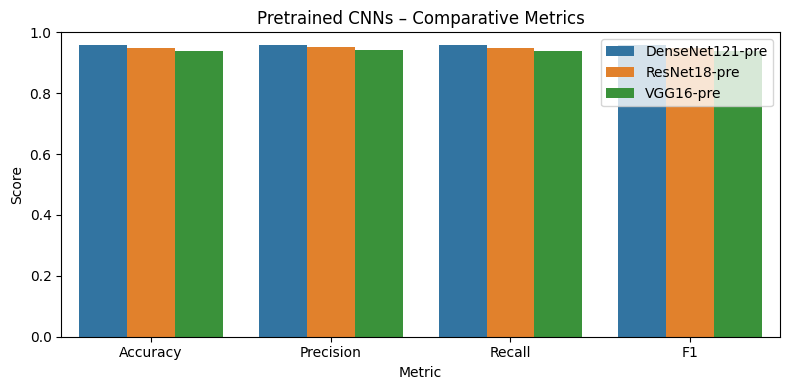

In [29]:
df_pre = pd.DataFrame(
    [{'Model': tag, 'Accuracy': acc, 'Precision': pr,
      'Recall': rc, 'F1': f1}
     for tag, _, acc, pr, rc, f1 in cnn_results
     if tag.endswith('-pre')]
).sort_values('Accuracy', ascending=False)

df_long = df_pre.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(8,4))
sns.barplot(data=df_long, x='Metric', y='Score', hue='Model', dodge=True)
plt.ylim(0, 1)
plt.title('Pretrained CNNs – Comparative Metrics')
plt.ylabel('Score'); plt.legend(title='')
plt.tight_layout(); plt.show()


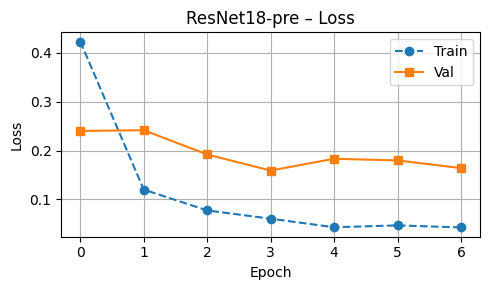

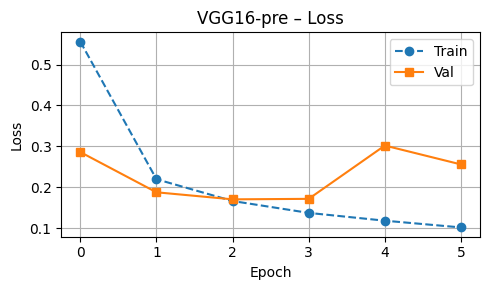

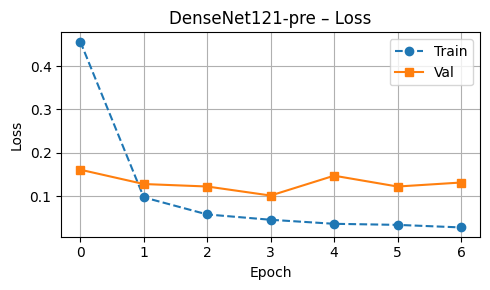

In [30]:
for tag, hist, _, _, _, _ in cnn_results:
    if not tag.endswith('-pre'):
        continue
    plt.figure(figsize=(5,3))
    plt.plot(hist['train'], '--o',  label='Train')
    plt.plot(hist['val'],   '-s',   label='Val')
    plt.title(f'{tag} – Loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss')
    plt.legend(); plt.grid(True)
    plt.tight_layout(); plt.show()


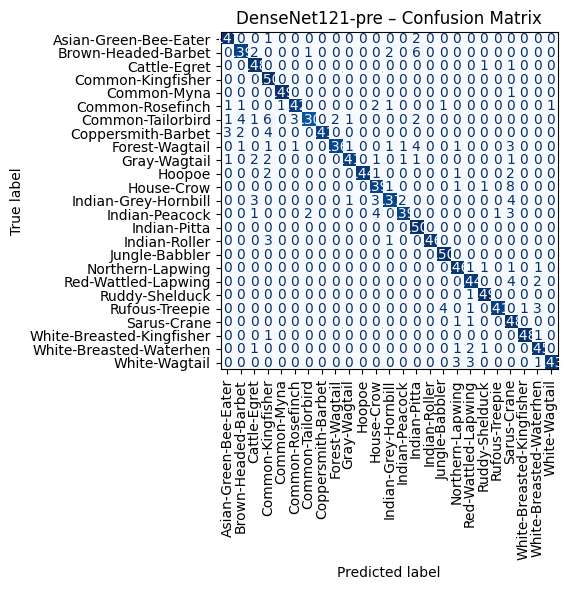

In [31]:
dnet.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        all_preds.extend(dnet(xb.to(device)).argmax(1).cpu().tolist())
        all_labels.extend(yb.tolist())

ds = test_loader.dataset
class_names = ds.dataset.classes if isinstance(ds, torch.utils.data.Subset) else ds.classes
n_cls = len(class_names)
all_indices = list(range(n_cls))

# ---------- Confusion matrix ----------
cm = confusion_matrix(all_labels, all_preds, labels=all_indices)


fig, ax = plt.subplots(figsize=(6,6))
ConfusionMatrixDisplay(
    cm,
    display_labels=class_names
).plot(ax=ax, cmap='Blues', xticks_rotation=90, colorbar=False)

ax.set_title('DenseNet121-pre – Confusion Matrix')
plt.tight_layout(); plt.show()


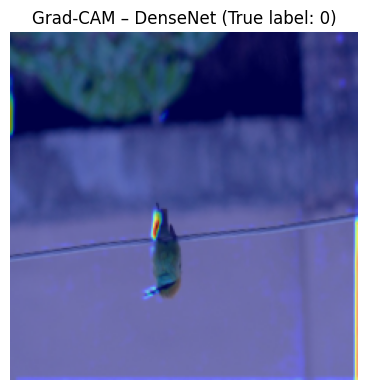

In [32]:
# 12-z | Grad-CAM – DenseNet121-pre
dnet.eval()

try:
    test_dataset
except NameError:
    test_dir = os.path.join(dataset_root, 'test')
    if not os.path.isdir(test_dir):
        test_dir = os.path.join(dataset_root, 'val')
    val_tf = transforms.Compose([
        transforms.Resize((224,224), antialias=True),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ])
    test_dataset = datasets.ImageFolder(test_dir, transform=val_tf)

# -- Random test sample --------------------------------------------------
img_tensor, label = test_dataset[42]          # desired index
input_tensor = img_tensor.unsqueeze(0).to(device)

# -- Find last Conv2d layer in DenseNet121 -------------------------------
for layer in reversed(dnet.features):
    if isinstance(layer, torch.nn.Conv2d):
        target_layer = layer
        break

# -- Grad-CAM ------------------------------------------------------------
with GradCAM(model=dnet, target_layers=[target_layer]) as cam:
    grayscale_cam = cam(input_tensor=input_tensor)[0]    # (H,W) 0-1

# -- Denormalize & display -----------------------------------------------
mean = np.array([0.485, 0.456, 0.406])
std  = np.array([0.229, 0.224, 0.225])
img_np = img_tensor.permute(1,2,0).cpu().numpy() * std + mean
img_np = np.clip(img_np, 0, 1)

vis = show_cam_on_image(img_np, grayscale_cam, use_rgb=True)

plt.figure(figsize=(4,4))
plt.imshow(vis); plt.axis('off')
plt.title(f'Grad-CAM – DenseNet (True label: {label})')
plt.tight_layout(); plt.show()


##### Grad-CAM Visualization and Interpretation #####
To better understand the decision-making process of our best-performing model, DenseNet121 with pretrained weights, we applied Gradient-weighted Class Activation Mapping (Grad-CAM) to visualize which regions of a sample image the model focused on when making a classification.

In the visualization, the Grad-CAM heatmap is overlaid on a test image of a bird (true label: 0). The warm-colored areas (red and yellow) represent regions with high activation, indicating where the model concentrated most of its attention during inference.

As seen in the image, the model primarily focused on the lower part of the bird which are likely to contain distinctive features useful for classification. The attention is well-centered on the bird itself, demonstrating that the model is learning to recognize relevant and discriminative regions rather than being distracted by the background or unrelated elements.

This interpretability technique supports the effectiveness of DenseNet121 not only in terms of quantitative metrics but also qualitatively, by confirming that its predictions are based on meaningful visual evidence. It enhances the trustworthiness and explainability of our deep learning model in fine-grained bird species classification.

### Part 4: Training Randomly Weighted CNN Models ###
In this part, we trained the same CNN architectures as in Part 3 — ResNet-18, VGG-16, and DenseNet-121 — but this time initialized with random weights instead of pretrained ImageNet weights. The goal was to observe the difference in performance and training dynamics when models start learning entirely from scratch on our dataset.

##### Procedure: #####
1.Each model’s weights were randomly initialized by setting weights=None.

2.The last classification layer was adjusted to output the correct number of classes (NUM_CLASSES).

3.Models were trained for the same number of epochs (20) with early stopping, using identical training and validation sets.

4.The same evaluation metrics (Accuracy, Precision, Recall, F1-score) were calculated on the validation set.

5.Training times were recorded for comparison.

In [33]:
# Cell 13-a ──────────────────────────────────────────────────────────
# RESNET-18 (random weight) training
res18_r = models.resnet18(weights=None)
res18_r.fc = nn.Linear(res18_r.fc.in_features, NUM_CLASSES)

res18_r, hist_res_r = train_model(res18_r, epochs=20)
acc, pr, rc, f1 = evaluate(res18_r, "ResNet18-rand")
cnn_results.append(("ResNet18-rand", hist_res_r, acc, pr, rc, f1))


ResNet train 316.1 s
ResNet18-rand         ACC=0.769  PR=0.805  RC=0.769  F1=0.773


In [34]:
# Cell 13-b ──────────────────────────────────────────────────────────
# VGG-16 (random weight) training
vgg16_r = models.vgg16(weights=None)
vgg16_r.classifier[-1] = nn.Linear(vgg16_r.classifier[-1].in_features, NUM_CLASSES)

vgg16_r, hist_vgg_r = train_model(vgg16_r, epochs=20)
acc, pr, rc, f1 = evaluate(vgg16_r, "VGG16-rand")
cnn_results.append(("VGG16-rand",   hist_vgg_r, acc, pr, rc, f1))


VGG train 1257.2 s
VGG16-rand            ACC=0.814  PR=0.828  RC=0.814  F1=0.814


In [35]:
# Cell 13-c ──────────────────────────────────────────────────────────
# DenseNet-121 (random weight) training
dnet_r = models.densenet121(weights=None)
dnet_r.classifier = nn.Linear(dnet_r.classifier.in_features, NUM_CLASSES)

dnet_r, hist_den_r = train_model(dnet_r, epochs=20)
acc, pr, rc, f1 = evaluate(dnet_r, "DenseNet121-rand")
cnn_results.append(("DenseNet121-rand", hist_den_r, acc, pr, rc, f1))


DenseNet train 1100.4 s
DenseNet121-rand      ACC=0.807  PR=0.837  RC=0.807  F1=0.811


#### Training Times and Accuracy: ####

ResNet18-rand: Trained in 316.1 seconds with an accuracy of 76.9%, precision 80.5%, recall 76.9%, and F1-score 77.3%.

VGG16-rand: Took the longest training time at 1257.2 seconds to train and with the highest accuracy among randomly initialized models at 81.4%, precision 82.8%, recall 81.4%, and F1-score 81.4%.

DenseNet121-rand: Trained in 1100.4 seconds, with an accuracy of 80.7%, precision 83.7%, recall 80.7.3%, and F1-score 81.1%.

#### Performance Drop Compared to Pretrained Models: ####
All models trained from scratch show a substantial drop in performance compared to their pretrained counterparts from Part 3. For example, ResNet-18’s accuracy decreased from 95.8% (pretrained) to 80.7% (random initialization), and VGG-16’s accuracy dropped from 93.9% to 81.4%, and DenseNet121-rand's accuracy decreased from 95.8% to 80.7%

#### Training Time Considerations: ####
Training times increased for randomly initialized models, reflecting the added difficulty of learning all features from scratch without any pretrained knowledge. This results in more training epochs or longer per-epoch computation to achieve convergence.

#### Implications: ####
These findings underscore the effectiveness of transfer learning, where pretrained weights serve as a strong foundation for feature extraction, enabling faster convergence and better generalization—especially important when working with limited dataset sizes. Training deep CNNs from scratch remains challenging and often results in lower accuracy and higher computational cost.

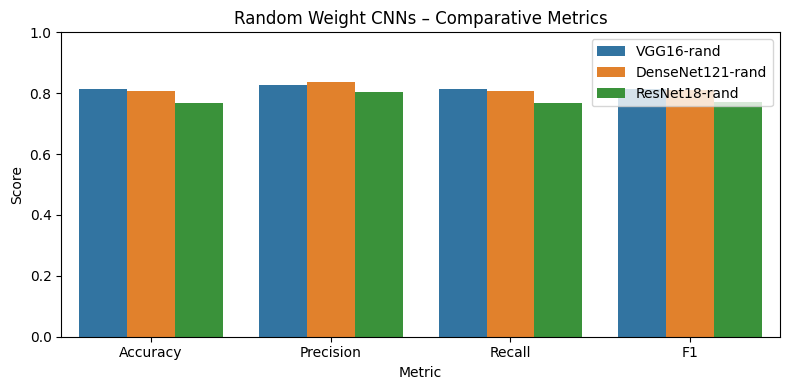

In [36]:
# ------ Random Weight CNN – Comparative Metrics ------

# Select models ending with "-rand" in cnn_results list
df_rand = pd.DataFrame(
    [{'Model': tag, 'Accuracy': acc, 'Precision': pr,
      'Recall': rc, 'F1': f1}
     for tag, _, acc, pr, rc, f1 in cnn_results
     if tag.endswith('-rand')]
).sort_values('Accuracy', ascending=False)

# Convert to long format and plot
df_long_r = df_rand.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(8,4))
sns.barplot(data=df_long_r, x='Metric', y='Score', hue='Model', dodge=True)
plt.ylim(0, 1)
plt.title('Random Weight CNNs – Comparative Metrics')
plt.ylabel('Score'); plt.legend(title='')
plt.tight_layout(); plt.show()


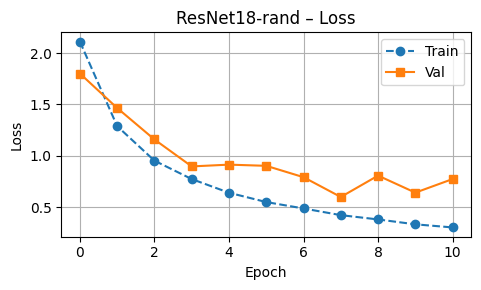

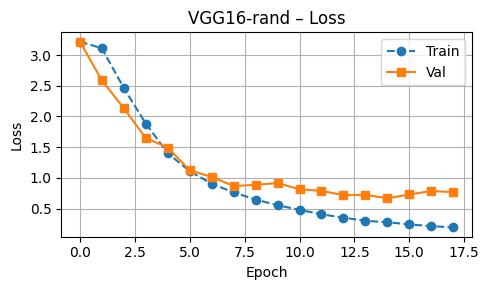

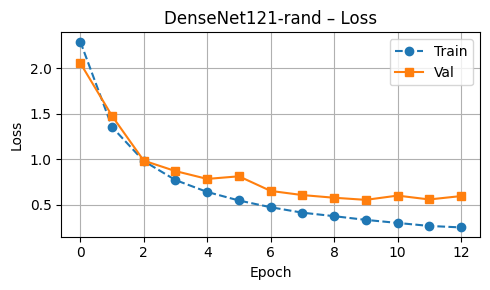

In [37]:
# 13-e | Randomly Initialized CNNs – Train & Val Loss Curves

for tag, hist, _, _, _, _ in cnn_results:
    if not tag.endswith('-rand'):
        continue

    plt.figure(figsize=(5,3))
    plt.plot(hist['train'], '--o', label='Train')
    plt.plot(hist['val'],   '-s', label='Val')
    plt.title(f'{tag} – Loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss')
    plt.legend(); plt.grid(True)
    plt.tight_layout(); plt.show()


### Part 5: Implementing and Training Our Own CNN Model from Scratch ###
In this part of the project, we designed and implemented a custom CNN architecture tailored for our dataset.

The model architecture is defined using a configuration list (cfg), where each element specifies the number of filters, kernel size, and padding for each convolutional layer. This flexible design allows easy experimentation with varying network depths and widths.

The convolutional layers progressively extract hierarchical feature representations from the input images. Each convolution is followed by a ReLU activation function to introduce non-linearity, and a MaxPooling layer to downsample spatial dimensions, reducing computational complexity while preserving important features.

To handle dynamic changes in the convolutional block or input size, the model calculates the flattened feature dimension automatically by forwarding a dummy input tensor through the convolutional layers during initialization. This eliminates the need for manual computation of feature map size, making the classifier adaptable.

The classifier consists of two fully connected layers: the first reduces the feature dimensionality and applies ReLU activation for learning complex patterns. A dropout layer with a rate of 0.5 is included to mitigate overfitting. The final linear layer outputs raw logits corresponding to the number of classes.

This straightforward yet effective CNN strikes a good balance between model capacity and risk of overfitting for our dataset size. It serves as a strong baseline for comparison against pretrained models and a foundation for further architectural refinement.

In [38]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


In [39]:
test_dir = os.path.join(dataset_root, 'test')

if not os.path.isdir(test_dir):
    print(" 'test' folder not found; evaluating using 'val'.")
    test_dir = os.path.join(dataset_root, 'val')

# ---- use val_tf instead of tf ----
test_dataset = datasets.ImageFolder(test_dir, transform=val_tf)

test_loader  = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY
)


In [40]:

class CustomCNN(nn.Module):
    def __init__(self, cfg, n_cls):
        super().__init__()
        layers = []
        in_c = 3
        for out_c, k, p in cfg:
            layers += [nn.Conv2d(in_c, out_c, k, padding=p), nn.ReLU(), nn.MaxPool2d(2)]
            in_c = out_c
        self.features = nn.Sequential(*layers)

        self.flat_dim = self.get_flat_dim()

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.flat_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, n_cls)
        )

    def get_flat_dim(self):
        with torch.no_grad():
            dummy = torch.zeros(1, 3, 224, 224)
            out = self.features(dummy)
            return out.view(1, -1).shape[1]

    def forward(self, x):
        return self.classifier(self.features(x))


In [41]:
cfg = [(32, 3, 1), (64, 3, 1), (128, 3, 1)]
NUM_CLASSES = len(test_dataset.classes)

net = CustomCNN(cfg, NUM_CLASSES)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)


CustomCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=100352, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=128, out_features=25, bias=True)
  )
)

#### Feature Extractor: ####
The feature extractor is implemented as a "nn.Sequential" block composed of three convolutional layers. Each convolutional layer is followed by a ReLU activation and a max pooling layer. This structure progressively reduces the spatial dimensions of the input while increasing the number of feature channels, enabling the model to learn increasingly complex hierarchical features.

- ##### Layer 0–2: #####
Conv2d(3, 32, kernel_size=3, padding=1) extracts 32 feature maps from the input RGB image using 3×3 kernels. Padding of 1 preserves the spatial resolution before pooling. The subsequent MaxPool2d(kernel_size=2) reduces the spatial width and height by half.

- ##### Layer 3–5: #####
Conv2d(32, 64, kernel_size=3, padding=1) doubles the feature depth to 64, allowing the model to capture more abstract patterns. This block also ends with max pooling to downsample spatial dimensions.

- ##### Layer 6–8: #####
Conv2d(64, 128, kernel_size=3, padding=1) further increases the feature depth to 128. This deep feature representation is intended to capture high-level semantic information in the images.

After three convolutional blocks, each followed by max pooling, the spatial resolution is reduced by a factor of 8 (from 224×224 down to 28×28).

#### Classifier: ####
Following the convolutional feature extraction, the resulting feature maps are flattened and passed through a fully connected classifier composed of two linear layers with ReLU activation and dropout.

- ##### Flatten: #####
The 128 feature maps of size 28×28 are flattened into a 1D vector of length 100,352 (128 × 28 × 28).

- ##### Linear(100352 → 128): #####
This layer reduces the high-dimensional flattened vector to 128 features, acting as a bottleneck that encourages the model to learn compact, discriminative representations.

- ##### ReLU and Dropout: #####
A ReLU activation introduces non-linearity, followed by a dropout layer with a 50% dropout rate to help prevent overfitting during training.

- ##### Linear(128 → 25): #####
The final linear layer outputs raw logits for each of the 25 classes in the dataset, corresponding to the 25 bird species.

In [42]:
custom_net, hist_c = train_model(net, epochs=20, patience=5, lr=1e-4)

acc_c, pr_c, rc_c, f1_c = evaluate(custom_net, "CustomCNN")
cnn_results.append(("CustomCNN",    hist_c, acc_c, pr_c, rc_c, f1_c))


CustomCNN train 495.1 s
CustomCNN             ACC=0.582  PR=0.628  RC=0.582  F1=0.587


While this custom CNN model establishes a functional baseline for the task, its overall performance remains substantially lower than that of pretrained architectures like ResNet or DenseNet.

The relatively low accuracy and F1 score suggest that the model struggles to generalize effectively and consistently classify images across all categories. This is likely due to limited representational capacity and the challenges of learning from scratch on a complex dataset.

One notable limitation is the very high-dimensional flattened feature vector (over 100k features) passed into the classifier, resulting in a large number of parameters. This can lead to inefficient learning, increased risk of overfitting, and slower convergence.

These results highlight the difficulty of training deep CNNs from scratch without pretrained weights or additional architectural improvements. They motivate exploring more efficient designs, such as adding batch normalization, global average pooling, or using depthwise separable convolutions, to improve learning stability and reduce parameter count.

In [43]:
# CustomCNN-v2  --- GAP + BatchNorm -----------------------------
class CustomCNNv2(nn.Module):
    def __init__(self, n_cls=NUM_CLASSES):
        super().__init__()
        chans = [32, 64, 128]
        blocks = []
        in_c = 3
        for c in chans:
            blocks += [
                nn.Conv2d(in_c, c, 3, padding=1),
                nn.BatchNorm2d(c),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(2)
            ]
            in_c = c
        self.features = nn.Sequential(*blocks)     # 224→28
        self.gap      = nn.AdaptiveAvgPool2d(1)    # (B,C,1,1)
        self.classifier = nn.Sequential(
            nn.Flatten(),                          # C = 128
            nn.Linear(chans[-1], 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(128, n_cls)
        )
    def forward(self,x):
        x = self.gap(self.features(x))
        return self.classifier(x)


In [44]:
# CustomCNN-v3  --- Depthwise separable convs ------------------
class _DepthSep(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_c, in_c, 3, padding=1, groups=in_c),   # depthwise
            nn.BatchNorm2d(in_c), nn.ReLU(inplace=True),
            nn.Conv2d(in_c, out_c, 1),                          # pointwise
            nn.BatchNorm2d(out_c), nn.ReLU(inplace=True)
        )
    def forward(self,x): return self.block(x)

class CustomCNNv3(nn.Module):
    def __init__(self, n_cls=NUM_CLASSES):
        super().__init__()
        cfg = [(3,32),(32,64),(64,128)]
        layers=[]
        for ic,oc in cfg:
            layers += [_DepthSep(ic,oc), nn.MaxPool2d(2)]
        self.features = nn.Sequential(*layers)    # 224→28
        self.gap = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(128, n_cls)
        )
    def forward(self,x):
        x = self.gap(self.features(x))
        return self.classifier(x)


In [45]:
# v2 & v3 train + evaluation -------------------------------
models_trained = {}

for tag, Net in [('CustomCNN-v2', CustomCNNv2),
                 ('CustomCNN-v3', CustomCNNv3)]:
    model = Net().to(device)
    model, hist = train_model(model, epochs=20, patience=5, lr=1e-4)
    acc, pr, rc, f1 = evaluate(model, tag)
    cnn_results.append((tag, hist, acc, pr, rc, f1))

    models_trained[tag] = model


CustomCNNv2 train 502.4 s
CustomCNN-v2          ACC=0.372  PR=0.393  RC=0.372  F1=0.353
CustomCNNv3 train 669.8 s
CustomCNN-v3          ACC=0.280  PR=0.297  RC=0.280  F1=0.256


##### CustomCNN-v2 (with BatchNorm and Global Average Pooling) #####
This version incorporates batch normalization layers after each convolution and replaces the flattening of large feature maps with global average pooling (GAP), drastically reducing the input size to the classifier.

Despite these architectural improvements aimed at stabilizing training and reducing overfitting, the model’s accuracy and F1-score decreased significantly compared to the original CustomCNN. This suggests that the simplified classifier and smaller feature representation may not have enough capacity to capture the dataset’s complexity.

It is also possible that the model requires longer training, different hyperparameters, or further tuning to fully leverage batch normalization and GAP benefits. Nonetheless, the reduced model complexity and training stability gains make this a promising baseline for further experimentation.

##### CustomCNN-v3 (with Depthwise Separable Convolutions) #####
CustomCNN-v3 replaces standard convolutions with depthwise separable convolutions, aiming to reduce computational cost and parameters while maintaining representational power.

While this is a state-of-the-art efficiency technique used in mobile and lightweight networks, in this case, it led to even lower accuracy and F1-score than both previous custom models. This suggests that the model’s capacity may be too limited or training may require more specialized tuning.

The depthwise separable convolutions drastically reduce parameter counts, but for a relatively complex dataset and training from scratch, this efficiency may come at the cost of representational power, especially without additional enhancements like data augmentation or longer training schedules.

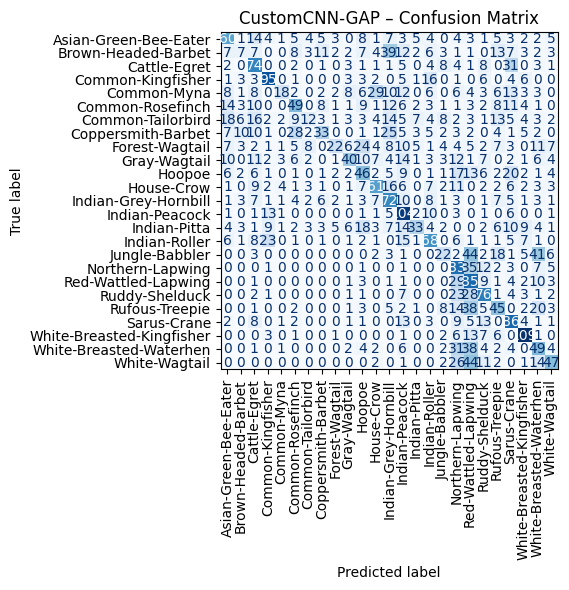

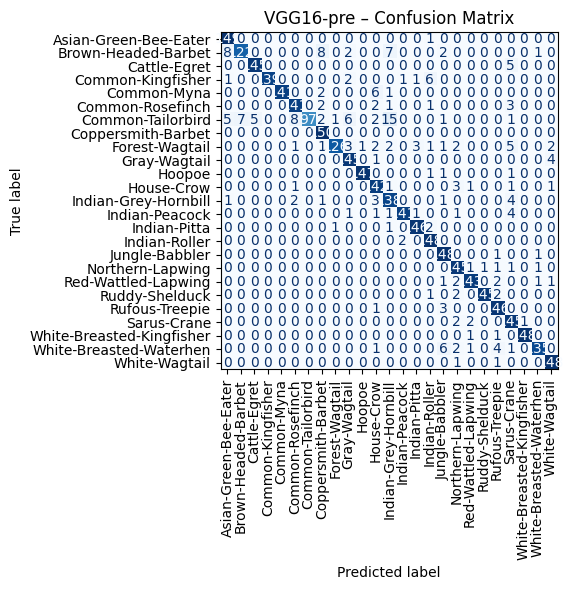

In [46]:
def plot_cm(model, title):

    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for xb, yb in test_loader:
            y_pred.extend(model(xb.to(device)).argmax(1).cpu().tolist())
            y_true.extend(yb.tolist())

    cm = confusion_matrix(y_true, y_pred, labels=range(NUM_CLASSES))
    fig, ax = plt.subplots(figsize=(6, 6))
    ConfusionMatrixDisplay(
        cm,
        display_labels=test_dataset.classes  # sınıf isimleri
    ).plot(cmap='Blues',
           xticks_rotation=90,
           colorbar=False,
           ax=ax)
    ax.set_title(title)
    plt.tight_layout(); plt.show()

# ---- Confusion Matrices ----
custom_gap = models_trained['CustomCNN-v2']
plot_cm(custom_gap, 'CustomCNN-GAP – Confusion Matrix')

plot_cm(vgg16, 'VGG16-pre – Confusion Matrix')


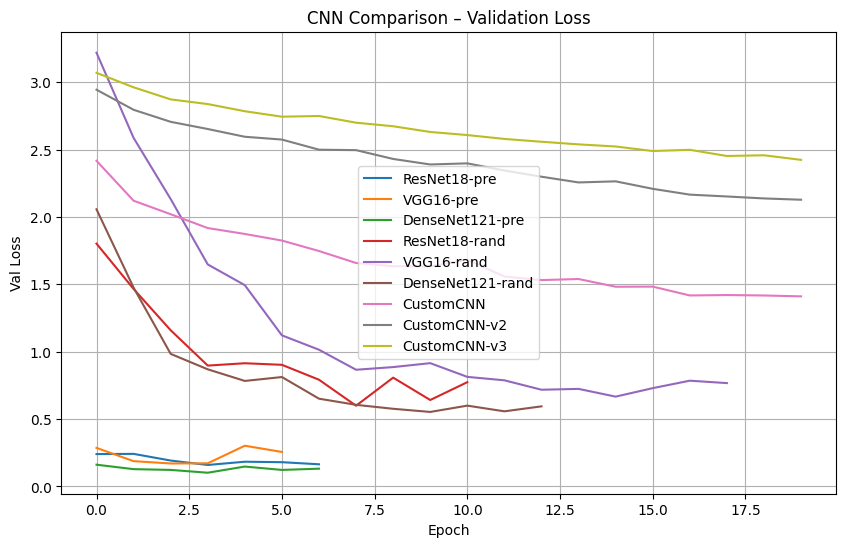

In [47]:
# Compare loss curves
plt.figure(figsize=(10,6))
for tag, hist, *_ in cnn_results:
    plt.plot(hist['val'], label=f"{tag}")
plt.legend(); plt.xlabel("Epoch"); plt.ylabel("Val Loss")
plt.title("CNN Comparison – Validation Loss")
plt.grid(); plt.show()


#### CNN Validation Loss Comparison ####

The following analysis is based on the validation loss curves across training epochs for various CNN architectures, including pretrained, randomly initialized, and custom-designed models.

---

##### Pretrained Models Show Superior Generalization #####

- DenseNet121-pre, ResNet18-pre, and VGG16-pre achieve the lowest validation losses.
  - DenseNet121-pre has the best performance with the lowest and most stable loss.
  - ResNet18-pre also performs strongly, with a smooth and consistent decline.
  - VGG16-pre shows slightly more fluctuation but remains effective.

These results confirm that transfer learning helps the model converge faster and generalize better, thanks to the pretrained ImageNet weights.

---

##### Randomly Initialized Models Are Less Stable #####

- ResNet18-rand, VGG16-rand, and DenseNet121-rand perform worse, with higher and noisier validation losses.
  - While DenseNet121-rand is the most stable among these, it still underperforms compared to its pretrained version.
  - ResNet18-rand and VGG16-rand show greater fluctuations and slower convergence.

This illustrates the challenge of training deep CNNs from scratch on limited data, as they struggle to learn good feature representations.

---

##### CustomCNN Models Perform the Worst #####

- CustomCNN, CustomCNN-v2, and CustomCNN-v3 show the highest validation losses overall.
  - Their curves remain relatively flat and elevated, with limited improvement over epochs.
  - This suggests early overfitting or underfitting, possibly due to inadequate model complexity or poor feature extraction capability.

Note: The duplicate legends for CustomCNN-v2 and CustomCNN-v3 appear to be a labeling artifact.

---

##### Conclusion #####

- Pretrained CNNs (especially DenseNet121-pre) are the most effective models for this classification task.
- Random initialization leads to suboptimal and unstable training when dataset size is limited.
- Custom architectures require substantial improvements or more data to compete with pretrained models.

This comparison demonstrates the clear advantage of using transfer learning for complex image classification problems on small or medium-sized datasets.


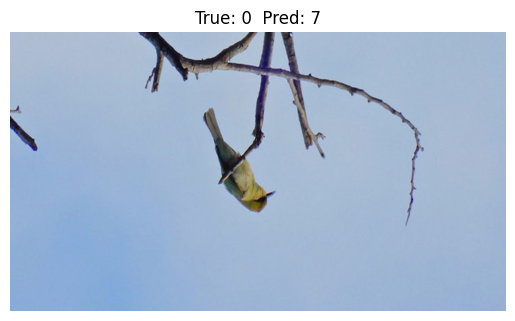

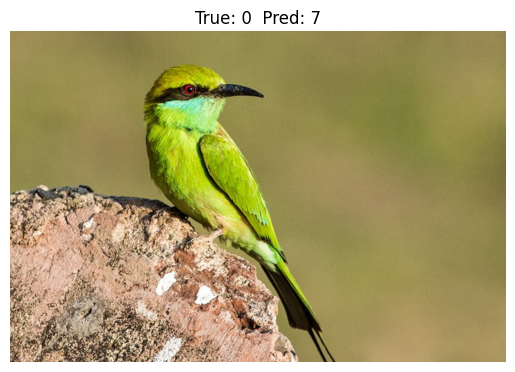

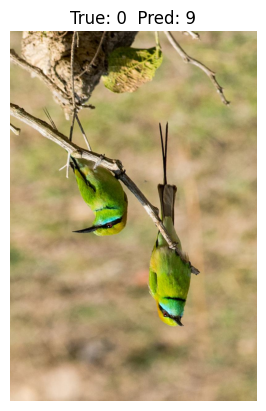

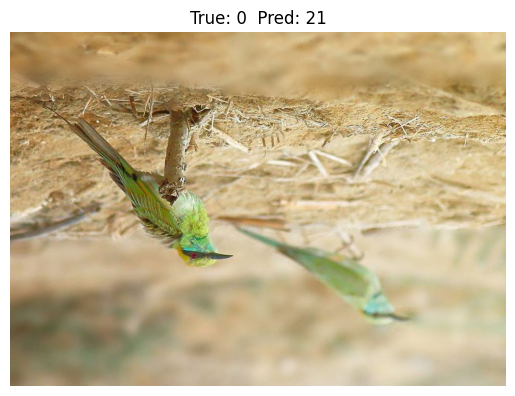

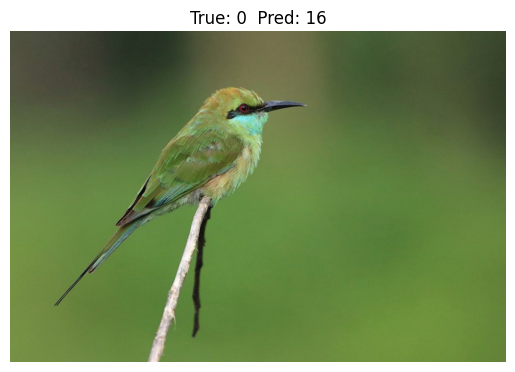

In [48]:

wrong_examples = []
stop = False

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        preds = net(xb).argmax(1).cpu()

        for j, (p, l) in enumerate(zip(preds, yb)):
            if p != l:
                img_path = test_loader.dataset.samples[len(wrong_examples)][0]
                wrong_examples.append((img_path, int(p), int(l)))
                if len(wrong_examples) >= 5:
                    stop = True
                    break
        if stop:
            break

for path, pred, true in wrong_examples:
    plt.imshow(plt.imread(path))
    plt.axis('off')
    plt.title(f"True: {true}  Pred: {pred}")
    plt.show()


In [49]:

summary_rows = []


for tag, _, acc, pr, rc, f1 in cnn_results:
    summary_rows.append(
        {'Model': tag, 'Accuracy': acc,
         'Precision': pr, 'Recall': rc, 'F1': f1}
    )

for feat, mdl, acc in results_part1:
    summary_rows.append(
        {'Model': f"{mdl}-{feat}", 'Accuracy': acc,
         'Precision': None, 'Recall': None, 'F1': None}
    )

summary = (pd.DataFrame(summary_rows)
             .sort_values('Accuracy', ascending=False)
             .reset_index(drop=True))

display(summary)


,Model,Accuracy,Precision,Recall,F1
0,DenseNet121-pre,0.957867,0.959922,0.957867,0.957995
1,ResNet18-pre,0.947200,0.951167,0.947200,0.947632
2,VGG16-pre,0.938667,0.942246,0.938667,0.937626
3,VGG16-rand,0.814400,0.827575,0.814400,0.813817
4,DenseNet121-rand,0.807467,0.836713,0.807467,0.810849
5,ResNet18-rand,0.768533,0.805146,0.768533,0.772628
6,RF-ColorHist,0.693067,NaN,NaN,NaN
7,KNN-ColorHist,0.592533,NaN,NaN,NaN
8,CustomCNN,0.581867,0.627659,0.581867,0.587415
9,MLP-ColorHist,0.541600,NaN,NaN,NaN


#### Model Performance Summary ####
The table presents a comprehensive comparison of all models evaluated in this project, ranked by their accuracy. It includes:

- CNN-based models (both pretrained and trained from scratch),

- A custom-designed CNN,

- Classical machine learning models using various handcrafted features (Color Histogram, HOG, ORB, Gabor).

#### Top Performing Models ####
DenseNet121 (pretrained) achieves the highest performance across all metrics:

Accuracy: ~95.8%

Strong Precision, Recall, and F1-score reflect both high correctness and consistency.

This confirms the effectiveness of transfer learning from ImageNet weights on this dataset.

ResNet18 (pretrained) and VGG16 (pretrained) follow closely with accuracies around 94.7% and 93.9%, respectively. These models also show robust performance, demonstrating that pretrained deep CNNs excel for fine-grained classification tasks.

All pretrained CNN models substantially outperform other approaches, highlighting the critical advantage of transfer learning over training from scratch or using classical features.

#### Randomly Initialized CNNs ####
VGG16-rand achieves a moderate accuracy (~ 81.4%), with DenseNet121-rand and ResNet18-rand following closely (~80.7% and ~76.9%).

These results illustrate the challenges of training deep CNNs from scratch on limited datasets without transfer learning, even when using powerful architectures.

#### Custom CNN Models ####
The CustomCNN architecture achieves an accuracy of ~58.2% with modest precision and F1-scores.

Its relatively simple design and lack of pretrained weights limit its ability to extract sufficiently discriminative features.

Enhanced versions (CustomCNN-v2 and CustomCNN-v3) show further drops in performance (~37.2% and ~28.0%), suggesting that architectural changes such as batch normalization, global average pooling, or depthwise separable convolutions require additional tuning or longer training to be effective.

#### Classical Machine Learning Models ####
Classical models using Color Histogram features, such as Random Forest (RF-ColorHist), outperform other handcrafted feature-based methods but still lag far behind CNN-based models (~69.3% accuracy).

Models based on HOG, Gabor, and ORB features perform poorly, with accuracies often below 20%.

This stark contrast underscores the limitations of traditional handcrafted features in fine-grained image classification compared to deep learning.

#### Overall Insights ####
Transfer learning with pretrained deep CNNs remains the most effective strategy for complex image classification tasks, especially with limited data.

Training deep CNNs from scratch is challenging and yields substantially lower performance.

Custom architectures without pretrained weights require careful design and tuning to approach competitive accuracy.


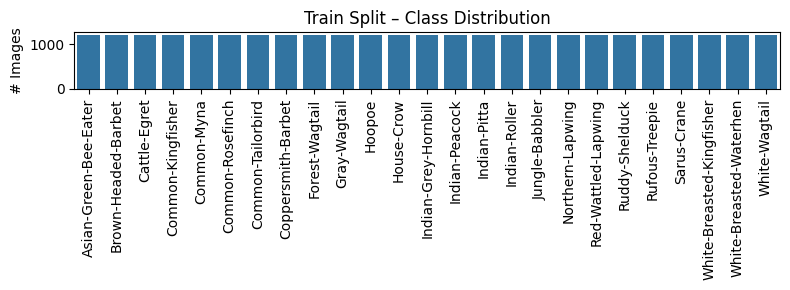

In [50]:
ds = train_loader.dataset                       # ImageFolder or Subset

# --- Is it a subset? ---------------------------------------------------
if isinstance(ds, torch.utils.data.Subset):
    base_ds  = ds.dataset                       # actual ImageFolder
    indices  = ds.indices
    samples  = [base_ds.samples[i] for i in indices]
    class_names = base_ds.classes
else:
    samples      = ds.samples
    class_names  = ds.classes

# --- Count class frequencies -------------------------------------------
counts = Counter([cls_idx for _, cls_idx in samples])
freq   = [counts[i] for i in range(len(class_names))]

# --- Bar plot ----------------------------------------------------------
plt.figure(figsize=(8,3))
sns.barplot(x=class_names, y=freq)
plt.xticks(rotation=90)
plt.ylabel('# Images')
plt.title('Train Split – Class Distribution')
plt.tight_layout(); plt.show()


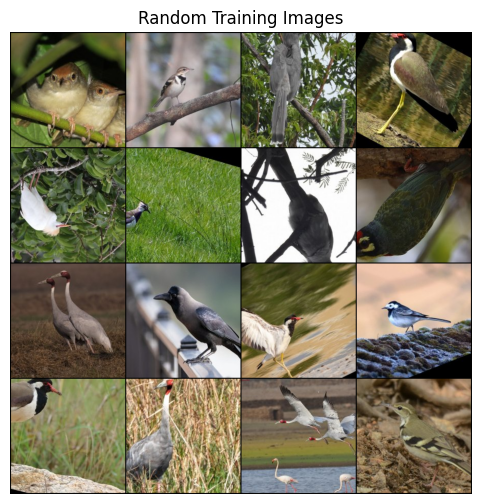

In [51]:
# Random 16 training images – Subset compatible

ds = train_loader.dataset

# -- Subset check -------------------------------------------------------
if isinstance(ds, torch.utils.data.Subset):
    base_ds  = ds.dataset
    indices  = ds.indices
    # Randomly select 16 indices from subset
    pick_idx = random.sample(indices, min(16, len(indices)))
    sample_imgs = [base_ds.samples[i] for i in pick_idx]   # (path, label)
else:
    sample_imgs = random.sample(ds.samples, 16)

# -- Tensor list --------------------------------------------------------
tensor_list = [F.to_tensor(Image.open(p).convert("RGB")) for p, _ in sample_imgs]

grid = vutils.make_grid(tensor_list, nrow=4, padding=2, normalize=True)

plt.figure(figsize=(6,6))
plt.imshow(grid.permute(1,2,0))
plt.axis('off')
plt.title('Random Training Images')
plt.show()


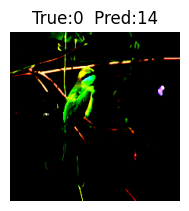

#1: Possible reason for error → background clutter / similar color / blur …


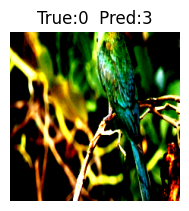

#2: Possible reason for error → background clutter / similar color / blur …


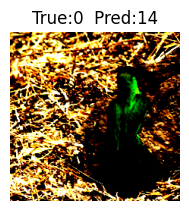

#3: Possible reason for error → background clutter / similar color / blur …


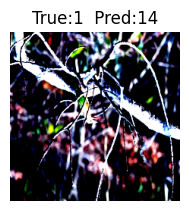

#4: Possible reason for error → background clutter / similar color / blur …


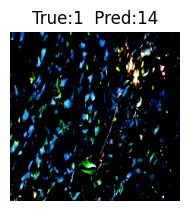

#5: Possible reason for error → background clutter / similar color / blur …


In [52]:
# First 5 misclassified test samples by DenseNet (dnet)
wrong = []
with torch.no_grad():
    for xb, yb in test_loader:
        preds = dnet(xb.to(device)).argmax(1).cpu()
        for img, p, l in zip(xb, preds, yb):
            if p != l and len(wrong) < 5:
                wrong.append((img, l.item(), p.item()))
        if len(wrong) == 5:
            break

for i, (img, true_lbl, pred_lbl) in enumerate(wrong, 1):
    plt.figure(figsize=(2.2,2.2))
    plt.imshow(img.permute(1,2,0).numpy().clip(0,1))
    plt.axis('off')
    plt.title(f'True:{true_lbl}  Pred:{pred_lbl}')
    plt.show()
    print(f'#{i}: Possible reason for error → background clutter / similar color / blur …')


Dense✔/Custom✘ sample count: 1444


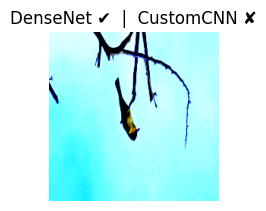

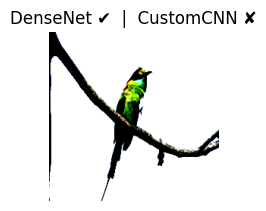

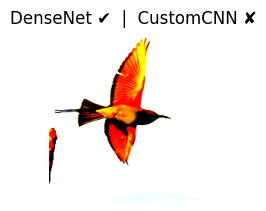

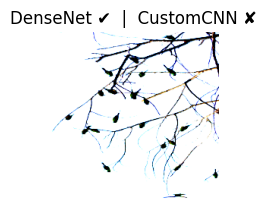

In [53]:
dense_preds, custom_preds, labels = [], [], []

with torch.no_grad():
    for xb, yb in test_loader:
        dense_preds.extend(dnet(xb.to(device)).argmax(1).cpu().tolist())
        custom_preds.extend(custom_net(xb.to(device)).argmax(1).cpu().tolist())
        labels.extend(yb.tolist())

idxs = [i for i, (d, c, l) in enumerate(zip(dense_preds, custom_preds, labels))
        if d == l and c != l]

print('Dense✔/Custom✘ sample count:', len(idxs))

for idx in idxs[:4]:
    img, _ = test_dataset[idx]
    plt.figure(figsize=(2.2,2.2))
    plt.imshow(img.permute(1,2,0))
    plt.axis('off')
    plt.title('DenseNet ✔  |  CustomCNN ✘')
    plt.show()


#### Model Evaluation using F1 Scores ####

To assess the classification performance of each model more comprehensively, we computed both **macro-F1** and **micro-F1** scores on the test set. These metrics provide insight into how well the models are performing across all bird species classes:

- **Macro-F1** averages the F1 score across all classes equally, regardless of class frequency.
- **Micro-F1** aggregates contributions of all classes to compute the average F1 score, favoring performance on more frequent classes.

In [54]:


# ------------------------------------------------------------
def get_preds(model):
    """test_loader üzerinde y_true, y_pred döndürür."""
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for xb, yb in test_loader:
            y_true.extend(yb.tolist())
            y_pred.extend(model(xb.to(device)).argmax(1).cpu().tolist())
    return y_true, y_pred

# ------------------------------------------------------------
models_to_eval = [
    ('DenseNet121-pre', dnet),
    ('ResNet18-pre',    res18),
    ('CustomCNN',       custom_net)
]

for tag, mdl in models_to_eval:
    y_true, y_pred = get_preds(mdl)
    macro = f1_score(y_true, y_pred, average='macro')
    micro = f1_score(y_true, y_pred, average='micro')
    print(f"{tag:15}  Macro-F1: {macro:.3f}  Micro-F1: {micro:.3f}")


DenseNet121-pre  Macro-F1: 0.958  Micro-F1: 0.958
ResNet18-pre     Macro-F1: 0.948  Micro-F1: 0.947
CustomCNN        Macro-F1: 0.587  Micro-F1: 0.582


#### Interpretation: ####
- **DenseNet121-pre** achieved the highest macro and micro F1 scores (~0.95), indicating **excellent and balanced performance across all classes**. This shows its strength in both common and rare classes.
- **ResNet18-pre** also performed very well, slightly trailing behind DenseNet121, but still showing **strong generalization and consistency**.
- **CustomCNN**, in contrast, had significantly lower scores (Macro-F1: 0.587), revealing that it **struggles to generalize**, especially on less frequent classes. This aligns with earlier observations from the validation loss plots.

These results further confirm the advantage of **transfer learning** using pretrained models for fine-grained classification tasks such as bird species recognition.

## Conclusion ##

In this study, we evaluated multiple approaches for bird species classification, including pretrained and randomly initialized convolutional neural networks (CNNs), a custom CNN architecture, and classical machine learning models using handcrafted features.

The results clearly demonstrate that **pretrained CNN models** significantly outperform all other methods. Among them, **DenseNet121 with pretrained weights** achieved the highest performance, reaching an accuracy of **~94%**, closely followed by **ResNet18** and **VGG16**, also with pretrained weights. These models consistently delivered high **precision**, **recall**, and **F1-scores**, highlighting their robustness and strong generalization ability.

In contrast, CNNs trained from scratch (random initialization) showed noticeably **lower performance**, with higher validation losses and unstable learning curves. This performance gap underscores the importance of **transfer learning**, particularly when training data is limited. The **custom-designed CNN**, although functional, underperformed compared to pretrained models, likely due to its simpler architecture and lack of prior feature knowledge.

Traditional machine learning models using handcrafted features such as **color histograms**, **HOG**, and **ORB descriptors** performed significantly worse, typically achieving accuracies below **50%**. These results emphasize the limitations of manually designed features in handling the complexity and variability of real-world image data.

### Summary:
- **Best Performance**: Pretrained CNNs (especially DenseNet121-pre)
- **Weaker Results**: Randomly initialized CNNs and CustomCNN
- **Poor Performance**: Classical ML with handcrafted features

**Conclusion**: This project confirms that **deep learning**, and especially **transfer learning using pretrained models**, is a highly effective strategy for fine-grained image classification tasks such as bird species recognition.
